In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [44]:
#loading the Taitanic.csv
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab2/data/Titanic.csv"
df = pd.read_csv(url, sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [47]:
#print(df.isna().sum())

#changing blanks and np.nan to sensible values

df["Embarked"] = df["Embarked"].replace(np.nan, "S", regex=True)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["HasCabin"] = df.Cabin.notna() #isnull() is usable to, but it reverses the resulte, "~ df.Cabin.isnull()" 
df.isna().sum()



PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
HasCabin          0
Title             0
dtype: int64

In [48]:
#adding Title column
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
print(df["Title"].value_counts())
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df["Title"] = df["Title"].replace(["Rev","Col","Major","Lady","Sir","Don","Capt","Countess","Jonkheer","Dr","Dona"],"Unique")
print(df["Title"].value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64
Mr        757
Miss      264
Mrs       198
Master     61
Unique     29
Name: Title, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Unique')])

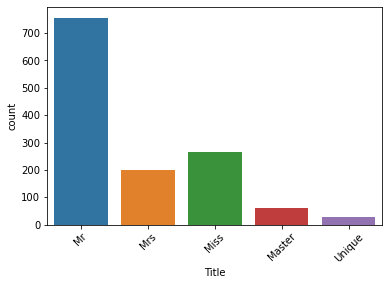

In [49]:
#Ploting Titles
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)


In [50]:
#Categorical Age and Fare
df["CatAge"] = pd.qcut(df.Age, q=4, labels=False)
df["CatFare"] = pd.qcut(df.Fare, q=4, labels=False)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


In [51]:
#droping columns that doesn't make sence in binary/numerical
df = df.drop(["Name","Age","Fare","Ticket","Cabin"], axis=1)

In [52]:
#converting the data to binary:
df_bi = pd.get_dummies(df) 
df_bi.head()

,PassengerId,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,1,0,False,0,0,0,1,0,0,1,0,0,1,0,0
1,2,1,1,0,True,3,3,1,0,1,0,0,0,0,0,1,0
2,3,3,0,0,False,1,1,1,0,0,0,1,0,1,0,0,0
3,4,1,1,0,True,2,3,1,0,0,0,1,0,0,0,1,0
4,5,3,0,0,False,2,1,0,1,0,0,1,0,0,1,0,0
